# 2. NLTK Dependency Graphs

A dependency representation is a labeled directed graph, where the nodes are the lexical items and the labeled arcs represent dependency relations from heads to dependents (from the NLTK book). A dependency graph is _projective_ if, when all the words are written in linear order, the edges can be drawn above the words without crossing. This is equivalent to saying that a word and all its descendents (dependents and dependents of its dependents, etc.) form a contiguous sequence of words within the sentence.

Let's play with the [CoNLL 2007 Dependency Treebank](http://www.ryanmcd.com/papers/conllXI.pdf) (If you did not already do it, you have to download it using nltk.download())

In [3]:
import nltk
nltk.download('conll2007')

[nltk_data] Downloading package conll2007 to /home/semen/nltk_data...


True

In [4]:
from nltk.corpus import conll2007
print (conll2007.readme())
import nltk


b'This directory contains a subset of the treebanks used in the CoNLL 2007 Shared Task,\nand they are distributed with permission under the terms of the\nCreative Commons Attribution-NonCommercial-NoDerivativeWorks license.\nhttp://nextens.uvt.nl/depparse-wiki/SharedTaskWebsite\n'


Read the parsed sentences, and keep the first one:

In [5]:
dc=conll2007.parsed_sents()
dg= dc[0]



/home/semen/.local/lib/python3.6/site-packages/nltk/parse/dependencygraph.py:399: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node " "that depends on the root element."


The nodelist attribute includes each word and its attributes:

In [6]:
first_sentence=conll2007.sents()[0]
print (first_sentence)

for node in dg.nodelist:
    print (node)

['Las', 'reservas', 'de', 'oro', 'y', 'divisas', 'de', 'Rusia', 'subieron', '800_millones_de_dólares', 'y', 'el', '26_de_mayo', 'equivalían', 'a', '19.100_millones_de_dólares', ',', 'informó', 'hoy', 'un', 'comunicado', 'del', 'Banco_Central', '.']


AttributeError: 'DependencyGraph' object has no attribute 'nodelist'

In [4]:
import pln_inco.syntax_trees
import pln_inco.graphviz as gv
from IPython.display import Image
from IPython.display import display
from IPython.display import display_png

In [5]:
import sys
print sys.getdefaultencoding()
import locale
print locale.getpreferredencoding()

ascii
UTF-8


As we did with syntax constituents trees, let's draw the dependency graph

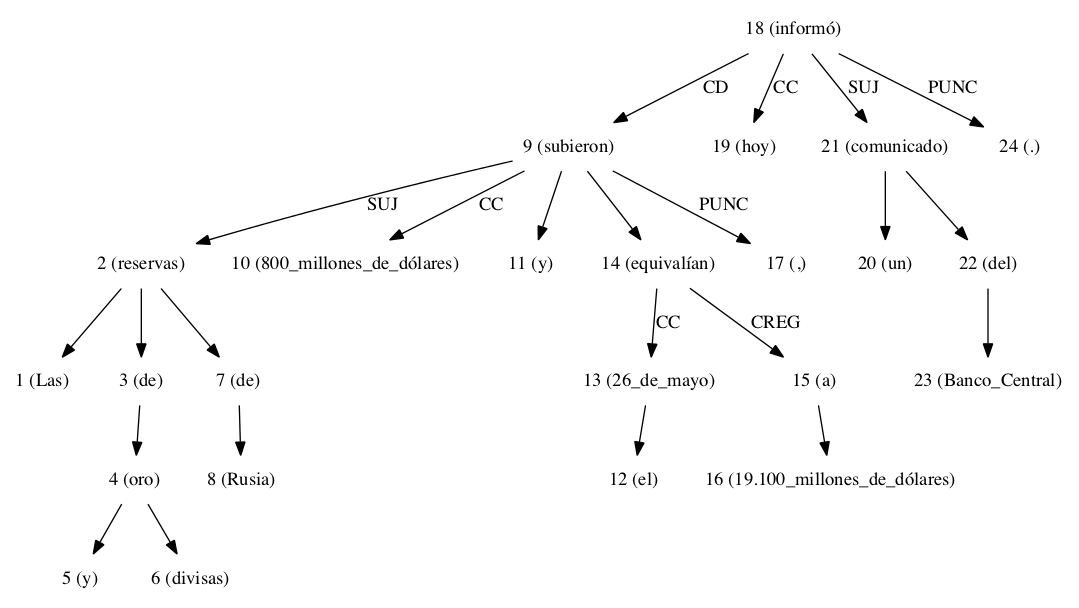

In [6]:
dep_tree=pln_inco.syntax_trees.dependency_to_dot(dg)
tree_png=Image(data=gv.generate(dep_tree,format='png'))
display_png(tree_png)

Every word in the sentence is modelled in NTLK as a dictionary including its ordinal within the sentences (address), it list of  dependents (deps), the id of its dependency head (head), the type of relation with its head (rel) and its POS tag (tag). The class for hold all these data is [nltk.parse.dependencygraph.DependencyGraph](https://nltk.googlecode.com/svn/trunk/doc/api/nltk.parse.dependencygraph.DependencyGraph-class.html)

In [7]:
type(dg)

nltk.parse.dependencygraph.DependencyGraph

NLTK includes a package for reading and writing dependency graphs, called nltk.parse.dependencygraph. They use the [Malt-TAB](http://stp.lingfil.uu.se/~nivre/research/MaltXML.html) format of the Malt Parser to read graphs. Let's see first how it looks.

(From the reference)

Malt-TAB is a text-based representation, which is mainly used by MaltParser. Malt-TAB contains a subset of the features in Malt-XML, and attributes are implicitly defined by their position. Each word is represented on one line, with attribute values being separated by tabs. The required order of attributes is as follows:

form (required) < postag (required) < head (optional) < deprel (optional)

Although head and deprel are optional, they must either both be included or both be omitted. (Normally, all four columns are present in the input when training the parser and in the output when parsing, while only form and postag are present in the input when parsing.) Please note also that the id attribute is not represented explicitly at all. Words in a sentence are separated by one newline; sentences are separated by one additional newline. 

Let's copy the contents of the nltk.parse.dependencygraph.malt_demo() to show how to read the Malt-TAB format using this module:

In [8]:
    dg = nltk.dependencygraph.DependencyGraph("""
    Pierre  NNP     2       NMOD 
    Vinken  NNP     8       SUB 
    ,       ,       2       P 
    61      CD      5       NMOD 
    years   NNS     6       AMOD 
    old     JJ      2       NMOD 
    ,       ,       2       P 
    will    MD      0       ROOT 
    join    VB      8       VC 
    the     DT      11      NMOD 
    board   NN      9       OBJ 
    as      IN      9       VMOD 
    a       DT      15      NMOD 
    nonexecutive    JJ      15      NMOD 
    director        NN      12      PMOD 
    Nov.    NNP     9       VMOD 
    CD      16      NMOD 
    .       .       9       VMOD 
  """)  

print dg.tree().pprint()

(will
  (Vinken Pierre , (old (years 61)) ,)
  (join (board the) (as (director a nonexecutive)) Nov.))


Observe that when converting to tree, dependency names are lost. But the original graph still include them:


digraph G{
edge [dir=forward]
node [shape=plaintext]

1 [label="1 (Pierre)"]
2 -> 1 [label="NMOD"]
2 [label="2 (Vinken)"]
8 -> 2 [label="SUB"]
3 [label="3 (,)"]
2 -> 3 [label="P"]
4 [label="4 (61)"]
5 -> 4 [label="NMOD"]
5 [label="5 (years)"]
6 -> 5 [label="AMOD"]
6 [label="6 (old)"]
2 -> 6 [label="NMOD"]
7 [label="7 (,)"]
2 -> 7 [label="P"]
8 [label="8 (will)"]
9 [label="9 (join)"]
8 -> 9 [label="VC"]
10 [label="10 (the)"]
11 -> 10 [label="NMOD"]
11 [label="11 (board)"]
9 -> 11 [label="OBJ"]
12 [label="12 (as)"]
9 -> 12 [label="VMOD"]
13 [label="13 (a)"]
15 -> 13 [label="NMOD"]
14 [label="14 (nonexecutive)"]
15 -> 14 [label="NMOD"]
15 [label="15 (director)"]
12 -> 15 [label="PMOD"]
16 [label="16 (Nov.)"]
9 -> 16 [label="VMOD"]
}


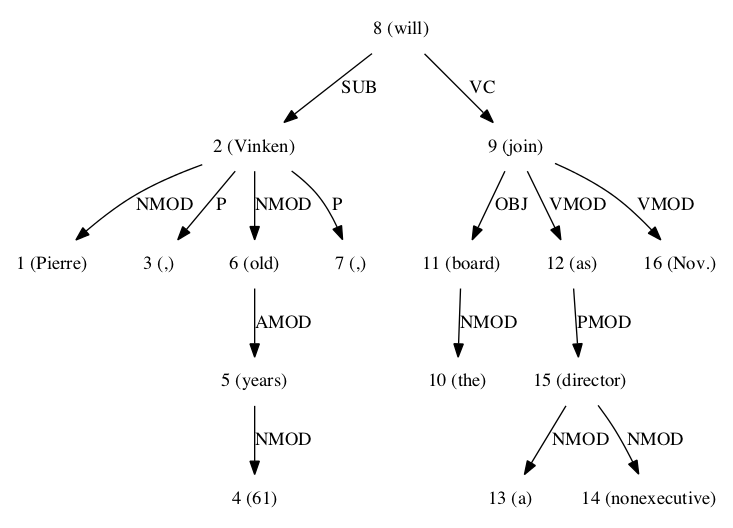

In [9]:

dep_tree=pln_inco.syntax_trees.dependency_to_dot(dg)
print dep_tree
tree_png=Image(data=gv.generate(dep_tree,format='png'))
display_png(tree_png)

The other popular format for dependency graphs is coNLL 2007. [Here](http://nextens.uvt.nl/depparse-wiki/DataFormat) is the complete reference.


In [10]:
print dg.to_conll(style=10) #coNLL format

1	Pierre	Pierre	NNP	NNP		2	NMOD	_	_
2	Vinken	Vinken	NNP	NNP		8	SUB	_	_
3	,	,	,	,		2	P	_	_
4	61	61	CD	CD		5	NMOD	_	_
5	years	years	NNS	NNS		6	AMOD	_	_
6	old	old	JJ	JJ		2	NMOD	_	_
7	,	,	,	,		2	P	_	_
8	will	will	MD	MD		0	ROOT	_	_
9	join	join	VB	VB		8	VC	_	_
10	the	the	DT	DT		11	NMOD	_	_
11	board	board	NN	NN		9	OBJ	_	_
12	as	as	IN	IN		9	VMOD	_	_
13	a	a	DT	DT		15	NMOD	_	_
14	nonexecutive	nonexecutive	JJ	JJ		15	NMOD	_	_
15	director	director	NN	NN		12	PMOD	_	_
16	Nov.	Nov.	NNP	NNP		9	VMOD	_	_



In [11]:
print dg.to_conll(style=4) #Malt-TAB format

Pierre	NNP	2	NMOD
Vinken	NNP	8	SUB
,	,	2	P
61	CD	5	NMOD
years	NNS	6	AMOD
old	JJ	2	NMOD
,	,	2	P
will	MD	0	ROOT
join	VB	8	VC
the	DT	11	NMOD
board	NN	9	OBJ
as	IN	9	VMOD
a	DT	15	NMOD
nonexecutive	JJ	15	NMOD
director	NN	12	PMOD
Nov.	NNP	9	VMOD



# References

- The NLTK  Book - 8   [Analyzing Sentence Structure](http://www.nltk.org/book/ch08.html)
- [nltk.parse.dependencygraph](https://nltk.googlecode.com/svn/trunk/doc/api/nltk.parse.dependencygraph-module.html) reference
- [Malt Parser](http://www.maltparser.org/)